<a href="https://colab.research.google.com/github/SachinPrasanth777/flask-app/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('framingham.csv')
df.dropna(axis=1, how='all').head()
df.fillna(0,inplace=True)
df.head()
print(df.columns.tolist())
print(df.isnull().sum())

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [3]:
print(df.head(), df.shape)
print(df.TenYearCHD.value_counts())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [4]:
X = np.asarray(df[['age', 'male', 'cigsPerDay','totChol', 'sysBP', 'glucose','BMI','heartRate']])
y = np.asarray(df['TenYearCHD'])
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (2968, 8) (2968,)
Test set: (1272, 8) (1272,)


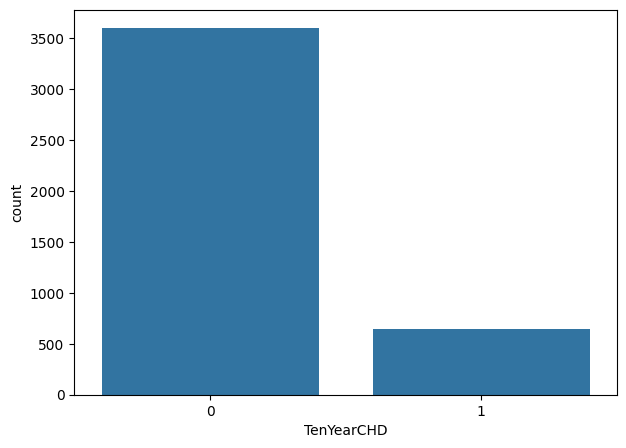

In [5]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df)
plt.show()

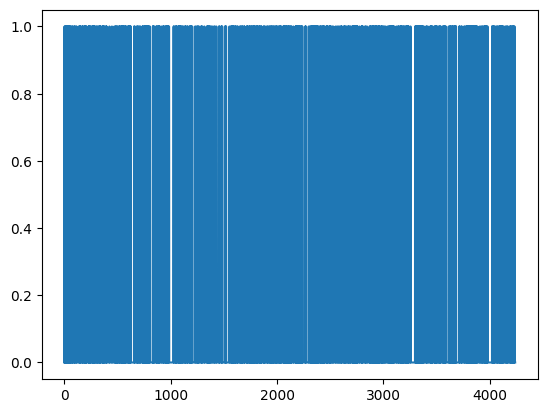

In [6]:
laste = df['TenYearCHD'].plot()
plt.show(laste)

In [20]:
models = {
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression()
}
for model_name in models:
  model = models[model_name]
  scores = cross_val_score(model,X,y,cv=25,scoring='accuracy',n_jobs=-1)
  print("==" * 30)
  print(model_name)
  print(f"Cross-Validation Scores: {scores}")
  print(f"Mean Accuracy: {np.mean(scores):.4f}")

SVC
Cross-Validation Scores: [0.84705882 0.84705882 0.84705882 0.84705882 0.84117647 0.84705882
 0.85294118 0.84705882 0.85294118 0.85882353 0.84705882 0.84705882
 0.84117647 0.84705882 0.84705882 0.85207101 0.85798817 0.84023669
 0.85207101 0.85798817 0.85207101 0.84615385 0.85207101 0.85798817
 0.83431953]
Mean Accuracy: 0.8488
GaussianNB
Cross-Validation Scores: [0.81176471 0.83529412 0.81176471 0.82941176 0.81764706 0.82352941
 0.81764706 0.87647059 0.82352941 0.82352941 0.83529412 0.82352941
 0.84705882 0.80588235 0.82352941 0.82840237 0.84023669 0.78698225
 0.84615385 0.85798817 0.84023669 0.84023669 0.83431953 0.79881657
 0.81656805]
Mean Accuracy: 0.8278
RandomForestClassifier
Cross-Validation Scores: [0.85294118 0.85294118 0.85882353 0.85294118 0.84705882 0.82941176
 0.84117647 0.84705882 0.86470588 0.86470588 0.83529412 0.84117647
 0.84117647 0.84117647 0.85882353 0.85798817 0.86390533 0.85798817
 0.85798817 0.85207101 0.83431953 0.84615385 0.85207101 0.84023669
 0.83431953]


In [21]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(f"Accuracy of the Model is {accuracy_score(y_test,y_pred)*100: .4f}")

Accuracy of the Model is  85.5346


In [27]:
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1084
           1       0.64      0.05      0.09       188

    accuracy                           0.86      1272
   macro avg       0.75      0.52      0.51      1272
weighted avg       0.83      0.86      0.80      1272

ROC-AUC Score: 0.5216


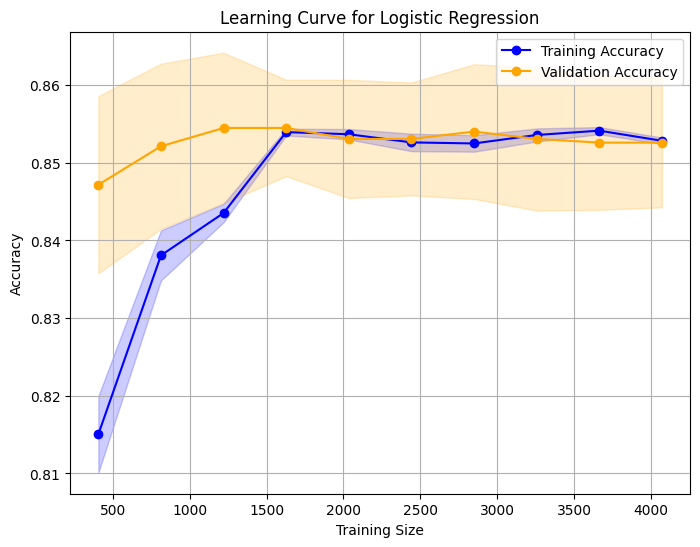

In [22]:
train_sizes, train_scores, test_scores = learning_curve(
    logreg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=25, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Logistic Regression')
plt.legend()
plt.grid()
plt.show()

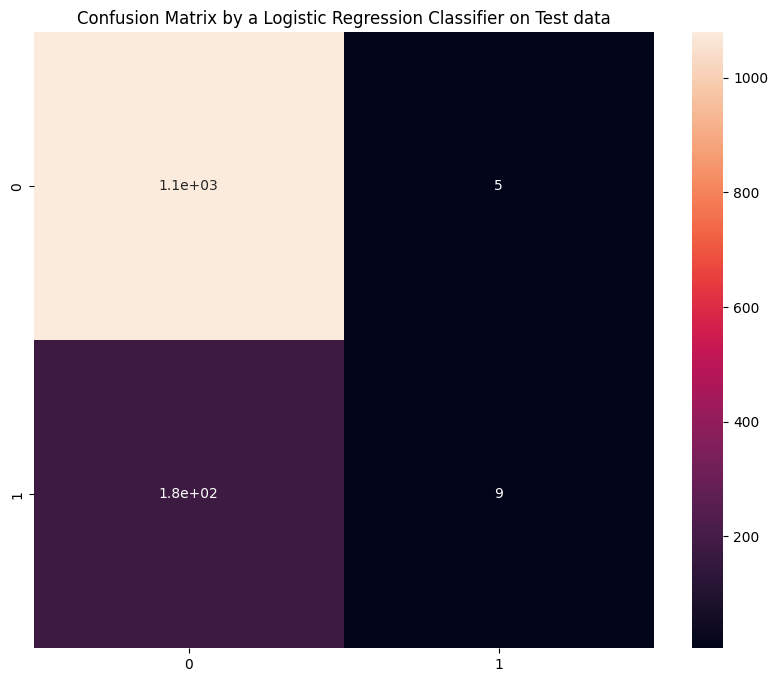

In [24]:
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix by a Logistic Regression Classifier on Test data")
plt.show()